<a href="https://colab.research.google.com/github/ektamistry/Computer-Vision/blob/main/Image_Resolution_and_Quality_Manipulation_Down_sampling%2C_Up_sampling%2C_and_Grey_Level_Resolution_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# read the original image
img1 = cv2.imread('/content/cameraman.tif',0)

In [ ]:
# image type
type(img)

numpy.ndarray

In [ ]:
np.max(img)

255

In [ ]:
#size of orignal img
[m,n]=img1.shape
print(m,n)

512 512


In [ ]:
cv2.imwrite("orignal_img.png", img)

True

In [ ]:
# Down sampling
# user input 'a' as sampling rate for down sampling
a = int(input("Enter the down sampling rate : "))
# creating a matrix of all zeros for downsampled values
img2 = np.zeros( (x//a,y//a) , dtype = np.int)
# taking pixel values from alternate rows and columns
for i in range (0,m,a):
    for j in range (0,n,a):
        try:
            img2[i//a][j//a]= img1[i][j]
        except IndexError:
            pass


Enter the down sampling rate : 2


In [ ]:
# Ascertain resolution of the new down sampled image
img2 = np.round(img2)
img2.shape

(256, 256)

In [ ]:
cv2.imwrite('DownSampled64_img.jpg', img2)

True

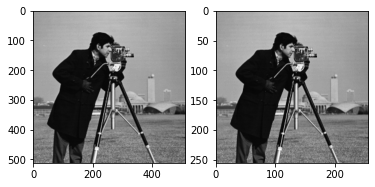

In [ ]:
# orignal img
plt.subplot(1,2,1)
plt.imshow(img , cmap = 'gray')
# down sampled img
plt.subplot(1,2,2)
plt.imshow(img2 , cmap = 'gray')

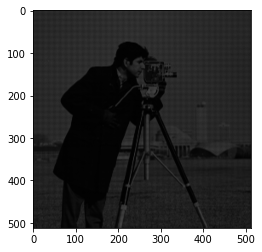

In [ ]:
# Up sampling
# create a matrix of zeros to store the upsampled image
img3 = np.zeros((x,y) , dtype = np.int)
# new size
for i in range(0, x-(a-1), a):
    for j in range(0, y-(a-1), a):
        img3[i,j]= img2[i//a][j//a]

plt.imshow(img3 , cmap = "gray")

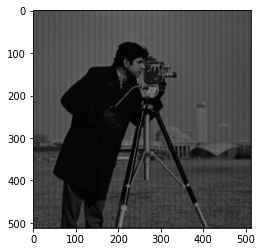

In [ ]:
#Nearest neighbour interpolation-Replication, Replicating rows
for i in range(1, x-(a-1) , a):
  for j in range(0, y-(a-1) , a):
    img3[i:i+(a-1),j] = img3[i-1,j]

plt.imshow(img3 , cmap = "gray")

In [ ]:
# replicating columns
for i in range (0, x-1):
  for j in range (1, y-1, a):
    img3[i,j:j+(a-1)] = img3[i,j-1]

# save the upsampled image
cv2.imwrite('upsampled64.jpg',img3)

True

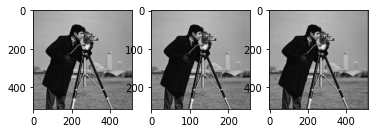

In [ ]:
#original image
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
# down sampled image
plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
# the up sampled image
plt.subplot(1,3,3)
plt.imshow(img3, cmap="gray")

In [ ]:
cv2.imwrite("upsampled_img.png", img3)


True

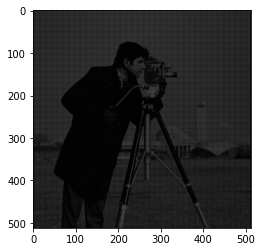

In [ ]:
# Averaging neighbouring rows pixels to get current pixel value
img4 = np.zeros( (x,y) , dtype = np.int)
# new size
for i in range (0,x-1,a):
  for j in range (1,y-1,a):
    img4[i,j]= img2[i//a][j//a]

plt.imshow(img4 , cmap = "gray")

In [ ]:
for i in range(1, m-1,a):
    for j in range(0, n-1 ):
        img4[i,j]= (img4[i-1,j]+img4[i+1,j])/2

In [ ]:
# Averaging neighbouring column pixels to get current pixel value
for i in range(0, m-1):
    for j in range(1, n-1,a):
        img4[i,j]= (img4[i,j-1]+img4[i,j+1])/2


##conclusion
1. In down-sampling technique, number of pixels in the given image is reduced depending on the sampling frequency. Due to this, resolution and size of the image decreases and hence the quality of the image also decreases.
2. In Up-sampling technique, Up-sampling technique increases the resolution as well as the size of the image and hence the quality of the image also increases.
3. In Grey level resolution of an image depends on the number of bits required to represent each pixel of the image. this image can have grey levels ranging from [0,255]. Grey level resolution of an image can be reduced by reducing the number of bits required to represent each pixel.